# 0. Seleção dos algoritmos

## Linear Models
- Perceptron
- LinearSVC (SVM for classification)
## Support Vector Machines
- SVC (Support Vector Classification)
## Stochastic Gradient Descent
- SGDClassifier
## K Nearest Neighbors
- KNearestNeighbors
## Naive Bayes
- Gaussian Naive Bayes
## Decision Trees
- CART
## Ensemble methods
- Random Forests
## Neural network models
- Multi-layer Perceptron

# 1. Preparando o ambiente

In [149]:
import numpy as np
import pandas as pd

#Algoritmos
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import seaborn as sns

# 2. Configurando os algoritmos

In [117]:
classifiers= []
names = []

## 2.1. Perceptron

In [118]:
names.append('Perceptron')
classifiers.append(Perceptron())
classifiers[-1]

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

## 2.2. LinearSVC

In [119]:
names.append('LinearSVC')
classifiers.append(LinearSVC())
classifiers[-1]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## 2.3. SVC

In [120]:
names.append('SVC')
classifiers.append(SVC())
classifiers[-1]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 2.4. SGDClassifier

In [121]:
names.append('SGDClassifier')
classifiers.append(SGDClassifier())
classifiers[-1]

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

## 2.5. NearestNeighbors

In [122]:
names.append('KNeighborsClassifier')
classifiers.append(KNeighborsClassifier(n_neighbors=7))
classifiers[-1]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

## 2.6. GaussianNB

In [123]:
names.append('GaussianNB')
classifiers.append(GaussianNB())
classifiers[-1]

GaussianNB(priors=None)

## 2.7. tree

In [124]:
names.append('DecisionTreeClassifier')
classifiers.append(tree.DecisionTreeClassifier())
classifiers[-1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 2.8. RandomForestClassifier

In [125]:
names.append('RandomForestClassifier')
classifiers.append(RandomForestClassifier())
classifiers[-1]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 2.9. MLPClassifier

In [126]:
names.append('MLPClassifier')
classifiers.append(MLPClassifier())
classifiers[-1]

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# 2. Preparação e Análise dos dados

In [12]:
dataset = pd.read_csv('dataset.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [13]:
dataset.head()

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,NaN
1,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,NaN
2,Bad rap actors good rap actors list?,good,actor,JJ,NNS,no,1,11,NaN
3,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,NaN
4,Bad rap actors good rap actors list?,list,actor,NN,NNS,no,4,7,NaN


In [14]:
rotulos = pd.read_csv('rotulos.csv')

In [15]:
dataset['is_category_candidate'] = rotulos['target']

In [16]:
dataset.head()

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,yes
1,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
2,Bad rap actors good rap actors list?,good,actor,JJ,NNS,no,1,11,no
3,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
4,Bad rap actors good rap actors list?,list,actor,NN,NNS,no,4,7,no


In [17]:
dataset.dtypes

sentence                  object
word                      object
nell_category             object
word_tag                  object
nell_category_tag         object
word_is_category          object
distance_from_category     int64
number_of_occurrences      int64
is_category_candidate     object
dtype: object

In [18]:
#Alterando tipos de dados identificados automáticamente
dataset['nell_category'] = pd.Categorical(dataset['nell_category'])
dataset['word_tag'] = pd.Categorical(dataset['word_tag'])
dataset['nell_category_tag'] = pd.Categorical(dataset['nell_category_tag'])
dataset['word_is_category'] = pd.Categorical(dataset['word_is_category'])
dataset['is_category_candidate'] = pd.Categorical(dataset['is_category_candidate'])
dataset.dtypes  

sentence                    object
word                        object
nell_category             category
word_tag                  category
nell_category_tag         category
word_is_category          category
distance_from_category       int64
number_of_occurrences        int64
is_category_candidate     category
dtype: object

In [19]:
dataset.describe(exclude=['category','object'])

,distance_from_category,number_of_occurrences
count,372.000000,372.000000
mean,10.061828,5.258065
std,31.646531,5.420642
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,3.000000
75%,3.000000,7.000000
max,240.000000,18.000000


In [20]:
#Análise dos dados
dataset.describe(include=['category'])

,nell_category,word_tag,nell_category_tag,word_is_category,is_category_candidate
count,372,324,355,372,372
unique,15,5,3,2,2
top,actor,JJ,NNS,no,no
freq,251,202,231,314,271


In [21]:
# Tratamento de dados faltantes
dataset.isnull().sum()

sentence                   0
word                       0
nell_category              0
word_tag                  48
nell_category_tag         17
word_is_category           0
distance_from_category     0
number_of_occurrences      0
is_category_candidate      0
dtype: int64

In [22]:
dataset.head()

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,yes
1,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
2,Bad rap actors good rap actors list?,good,actor,JJ,NNS,no,1,11,no
3,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
4,Bad rap actors good rap actors list?,list,actor,NN,NNS,no,4,7,no


In [23]:
dataset['word_tag'] = dataset.apply(lambda row: str(row['word_tag']), axis=1)
dataset['nell_category_tag'] = dataset.apply(lambda row: str(row['nell_category_tag']), axis=1)

In [24]:
enc = LabelEncoder()
df = pd.DataFrame({'nell_category':enc.fit_transform(dataset['nell_category'])})
df['word_tag'] = enc.fit_transform(dataset['word_tag'])
df['nell_category_tag'] = enc.fit_transform(dataset['nell_category_tag'])
df['word_is_category'] = enc.fit_transform(dataset['word_is_category'])
df['distance_from_category'] = dataset['distance_from_category']
df['number_of_occurrences'] = dataset['number_of_occurrences']
df['is_category_candidate'] = enc.fit_transform(dataset['is_category_candidate'])

In [25]:
df.head()

,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,0,0,2,0,2,3,1
1,0,1,2,0,1,2,0
2,0,0,2,0,1,11,0
3,0,1,2,0,1,2,0
4,0,1,2,0,4,7,0


In [140]:
df['nell_category'] = pd.Categorical(df['nell_category'])
df['word_tag'] = pd.Categorical(df['word_tag'])
df['nell_category_tag'] = pd.Categorical(df['nell_category_tag'])
df['word_is_category'] = pd.Categorical(df['word_is_category'])
df['is_category_candidate'] = pd.Categorical(df['is_category_candidate'])

In [141]:
df.dtypes

nell_category             category
word_tag                  category
nell_category_tag         category
word_is_category          category
distance_from_category       int64
number_of_occurrences        int64
is_category_candidate     category
dtype: object

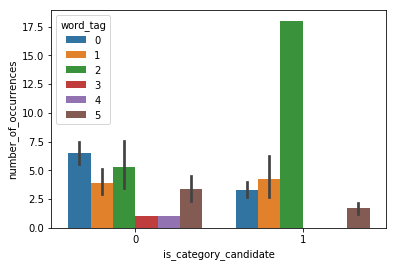

In [142]:
sns.barplot(x='is_category_candidate', y='number_of_occurrences', hue='word_tag', data=df);

# 3. Validação Cruzada

In [143]:
names

['Perceptron',
 'LinearSVC',
 'SVC',
 'SGDClassifier',
 'KNeighborsClassifier',
 'GaussianNB',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'MLPClassifier']

In [144]:
scores = []
for clf in classifiers:
    scores.append(cross_val_score(clf, df.drop(columns=['is_category_candidate']),
                                  df['is_category_candidate'],cv=10, n_jobs=8))

/home/wesley/.ve/subcategories/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/wesley/.ve/subcategories/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/wesley/.ve/subcate

In [145]:
scores

[array([0.53846154, 0.59459459, 0.43243243, 0.67567568, 0.45945946,
        0.7027027 , 0.72972973, 0.56756757, 0.7027027 , 0.72972973]),
 array([0.71794872, 0.64864865, 0.67567568, 0.72972973, 0.72972973,
        0.72972973, 0.72972973, 0.72972973, 0.56756757, 0.72972973]),
 array([0.76923077, 0.83783784, 0.78378378, 0.72972973, 0.7027027 ,
        0.81081081, 0.78378378, 0.81081081, 0.78378378, 0.81081081]),
 array([0.53846154, 0.72972973, 0.72972973, 0.72972973, 0.72972973,
        0.7027027 , 0.72972973, 0.72972973, 0.62162162, 0.72972973]),
 array([0.79487179, 0.72972973, 0.78378378, 0.75675676, 0.67567568,
        0.75675676, 0.72972973, 0.89189189, 0.72972973, 0.72972973]),
 array([0.33333333, 0.45945946, 0.35135135, 0.51351351, 0.37837838,
        0.72972973, 0.27027027, 0.43243243, 0.56756757, 0.64864865]),
 array([0.87179487, 0.72972973, 0.75675676, 0.81081081, 0.67567568,
        0.78378378, 0.81081081, 0.75675676, 0.81081081, 0.64864865]),
 array([0.82051282, 0.81081081, 0.

# 4. Avaliação

In [154]:
result = {'name':names,'mean':[x.mean() for x in scores]}
df_result = pd.DataFrame(result)

(0, 1)

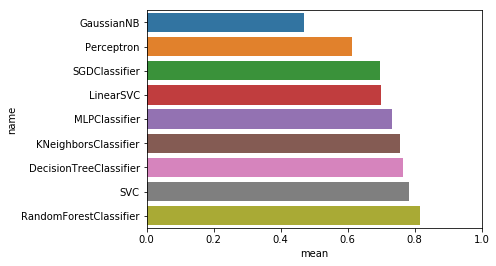

In [156]:
import matplotlib.pyplot as plt
ax = sns.barplot(x='mean',y='name', data=df_result.sort_values('mean'))
ax.set_xlim((0, 1))